# Explaining Predictions via SHAP

In [2]:
import shap
import joblib
import pandas as pd

## Load Model and Test Data

To calculate SHAP values, we'll use the trained HistGradientBoostingClassifier model pipeline from scikit-learn and the test data set. 

In [3]:
model = joblib.load("../models/sklearn_gbc_full.pkl")
test = pd.read_parquet("../data/test_data_full")
X_test = test.drop("churn",axis=1)
y_test = test[["churn"]]

In [4]:
X_test.shape

(6840, 49)

In [5]:
X_test.head()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,...,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,1000280,M,1317,259349.89726,1,22,1,33,44,3,...,0.000000,0.125935,0.349819,0.195899,14.300595,0.741616,0.111942,0.125935,0.041978,4.113870
1,1071308,F,1693,352855.68121,1,18,0,12,67,18,...,0.031032,0.134472,0.268943,0.320663,14.574648,0.765453,0.082752,0.010344,0.010344,2.927342
2,1311711,M,620,114434.47748,1,8,1,7,24,6,...,0.030705,0.092114,0.337751,0.337751,14.431196,0.706207,0.030705,0.122819,0.000000,4.574996
3,1829495,M,392,83697.90008,1,5,0,2,5,5,...,0.000000,0.087055,0.522332,0.304694,14.451189,0.696443,0.043528,0.000000,0.000000,2.568133
4,1875484,M,1834,378543.56859,1,25,1,14,65,12,...,0.038631,0.106236,0.357338,0.231787,14.477031,0.782281,0.096578,0.048289,0.038631,3.225703


In [6]:
pd.set_option("max.columns", None)
X_test.describe()

,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
count,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,1142.051608,2.324588e+05,0.726901,13.279678,0.287719,10.737427,41.680848,8.296784,17.198099,1.317398,2.168129,6.573538,26.872222,17.103801,934.633918,51.633333,5.849854,2.249854,1.112573,0.540497,207.189620,961.506140,84.245175,95.187719,40.741980,0.790026,80.973294,65.709756,65.607553,4.617887,19.681333,0.004753,0.192953,0.921319,0.101987,0.632038,0.024996,0.063066,0.128216,0.406920,0.290829,15.026600,0.781146,0.095365,0.066991,0.019413,4.612471
std,1305.135561,2.703691e+05,0.445584,12.911171,0.593350,12.385132,45.122534,11.493550,20.666213,1.867051,2.897595,7.787470,31.722206,20.126331,1086.743989,64.470272,7.095703,2.643236,1.636034,0.498394,220.715662,1118.041478,82.973874,109.114756,19.125031,0.178151,48.921246,41.789807,76.240750,2.984076,87.865708,0.021248,0.269594,5.223949,0.114135,2.551242,0.166061,1.888116,1.252174,0.201747,1.446179,43.652437,0.487177,0.209377,0.131629,0.070250,44.412728
min,1.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.000000,5.049357e+04,0.000000,5.000000,0.000000,2.000000,11.000000,0.000000,3.000000,0.000000,0.000000,1.000000,5.000000,3.000000,203.000000,10.000000,1.000000,0.000000,0.000000,0.000000,57.000000,209.000000,27.000000,22.000000,28.223452,0.750000,45.857143,35.333333,14.036389,2.479248,17.305368,0.000000,0.105776,0.570483,0.000000,0.060748,0.000000,0.000000,0.056348,0.327421,0.176396,14.225097,0.621332,0.044850,0.000000,0.000000,2.909559
50%,699.500000,1.395038e+05,1.000000,9.000000,0.000000,7.000000,27.000000,4.000000,10.000000,1.000000,1.000000,4.000000,16.000000,10.000000,559.000000,30.000000,4.000000,1.000000,1.000000,1.000000,137.000000,575.500000,59.000000,59.000000,48.309560,0.830920,73.444444,58.924038,39.405139,4.126578,17.918874,0.000000,0.149159,0.664870,0.096156,0.290567,0.011004,0.025075,0.095081,0.401955,0.250862,14.565690,0.726964,0.082425,0.030018,0.005705,3.400764
75%,1555.000000,3.168782e+05,1.000000,17.000000,0.000000,15.000000,56.000000,12.000000,24.000000,2.000000,3.000000,9.000000,37.000000,23.000000,1275.000000,69.000000,8.000000,3.000000,2.000000,1.000000,281.000000,1312.000000,113.000000,128.000000,56.757876,0.882353,106.340909,87.515686,89.861528,6.127275,18.951759,0.000000,0.212392,0.845347,0.155054,0.980066,0.028320,0.046844,0.135624,0.475748,0.328380,14.807982,0.862228,0.116448,0.085272,0.0233

In [7]:
model.steps

[('preprocessing',
  ColumnTransformer(transformers=[('cat',
                                   Pipeline(steps=[('impute',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('ohe',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   ['gender']),
                                  ('num',
                                   Pipeline(steps=[('impute',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('scaler', StandardScaler())]),
                                   ['non_song_interaction_count', 'advert_rate',
                                    'interaction_rate', 'GET_200_count',...
                                    'upgrade_count', 'thumbs_up_pct',
                                    'about_count', 'downgrade_count',
   

When computing SHAP values, the explainer object expects just a model and dataset. However, the model object above is a Pipeline. As a result, the data needs to be transformed via the preprocessor so it can be analyzed directly with just the model part of the Pipeline object.

In [8]:
X_test_preprocessed = model['preprocessing'].transform(X_test)

explainer = shap.Explainer(model['model'])
shap_values = explainer.shap_values(X_test_preprocessed, check_additivity=False)

In [9]:
shap_values

array([[-0.00129421, -0.00034885,  0.        , ...,  0.02617339,
         0.02982454,  0.0177971 ],
       [ 0.00069491,  0.00135116,  0.        , ...,  0.04791618,
         0.05916257,  0.00873046],
       [-0.00121776, -0.00171289,  0.        , ...,  0.02586844,
         0.05655475,  0.01121016],
       ...,
       [-0.00280817, -0.00378203,  0.        , ...,  0.03431715,
         0.07960696,  0.01379635],
       [-0.00285186, -0.00296694,  0.        , ...,  0.05677361,
         0.05926194,  0.01303003],
       [ 0.00055099,  0.00028352,  0.        , ...,  0.02915388,
        -0.10837819,  0.01806902]])

In [10]:
shap_values.shape

(6840, 50)

Get all of the feature names and create a list of them in the correct order. 

In [11]:
vars1 = model["preprocessing"].transformers_[0][1][1].get_feature_names_out().tolist()
vars2 = model["preprocessing"].transformers_[1][2]
vars3 = model["preprocessing"].transformers_[2][2]
var_names = vars1+vars2+vars3
print(var_names)

['x0_F', 'x0_M', 'x0_None', 'non_song_interaction_count', 'advert_rate', 'interaction_rate', 'GET_200_count', 'settings_rate', 'tenure_days', 'help_count', 'home_rate', 'submit_downgrade_rate', 'add_playlist_count', 'add_playlist_rate', 'thumbs_up_rate', 'PUT_307_count', 'avg_session_length_hours', 'save_settings_rate', 'next_song_rate', 'upgrade_count', 'thumbs_up_pct', 'about_count', 'downgrade_count', 'submit_downgrade_count', 'about_rate', 'non_song_interaction_rate', 'add_friend_rate', 'upgrade_rate', 'thumbs_up_count', 'error_rate', 'avg_songs_session', 'count_items', 'save_settings_count', 'next_song_count', 'thumbs_down_rate', 'error_count', 'sum_length', 'help_rate', 'thumbs_down_count', 'settings_count', 'add_friend_count', 'sum_session_length_hours', 'advert_count', 'session_count', 'downgrade_rate', 'PUT_200_count', 'home_count', 'avg_items_session', 'paid', 'submit_upgrade']


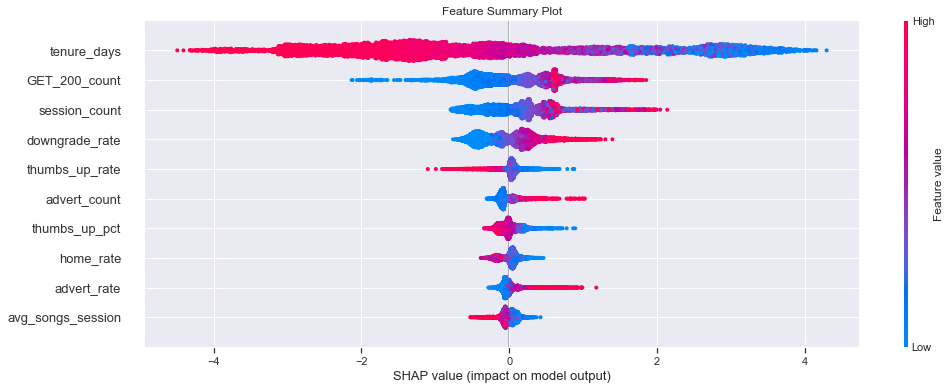

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
fig, ax = plt.subplots()
fig = shap.summary_plot(shap_values, 
                        X_test_preprocessed, 
                        feature_names=var_names, 
                        max_display=10,
                        show=False,plot_size=(16,6))
plt.title("Feature Summary Plot")
plt.savefig("../output/shap_summary.png")

The most important feature according to SHAP is the customer's tenure (`tenure_days`). Customers with longer tenure tend to have a lower chance of cancelling their subscription. Many of the top features have directionality consistent with intuitive explanations. For example, customers with higher `thumbs_up_rate` have a lower chance of churn, as a customer listening to songs they like should. 

In [13]:
pd.DataFrame(X_test_preprocessed, columns = var_names).describe()

,x0_F,x0_M,x0_None,non_song_interaction_count,advert_rate,interaction_rate,GET_200_count,settings_rate,tenure_days,help_count,home_rate,submit_downgrade_rate,add_playlist_count,add_playlist_rate,thumbs_up_rate,PUT_307_count,avg_session_length_hours,save_settings_rate,next_song_rate,upgrade_count,thumbs_up_pct,about_count,downgrade_count,submit_downgrade_count,about_rate,non_song_interaction_rate,add_friend_rate,upgrade_rate,thumbs_up_count,error_rate,avg_songs_session,count_items,save_settings_count,next_song_count,thumbs_down_rate,error_count,sum_length,help_rate,thumbs_down_count,settings_count,add_friend_count,sum_session_length_hours,advert_count,session_count,downgrade_rate,PUT_200_count,home_count,avg_items_session,paid,submit_upgrade
count,6840.000000,6840.000000,6840.0,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,0.481433,0.518567,0.0,-0.008146,0.004693,-0.007177,-0.008151,0.062228,-0.017041,-0.007771,-0.010155,0.012276,0.001484,0.010066,-0.009436,-0.008148,0.004259,0.025305,-0.002919,-0.009379,-0.036634,-0.008062,0.003313,-0.008921,0.402678,-0.008718,0.002436,-0.010112,-0.001180,0.017968,0.006507,-0.008270,-0.005717,-0.001670,0.028590,-0.010110,-0.001714,0.032694,-0.000018,-0.005153,-0.001959,-0.008049,-0.006509,-0.008111,-0.003309,-0.001581,-0.008138,0.005274,0.726901,0.540497
std,0.499692,0.499692,0.0,0.035215,1.280209,0.652929,0.021441,6.549896,1.018552,0.034357,0.125436,1.470358,0.984407,1.014435,1.224645,0.045654,0.987010,2.448616,0.863847,0.994721,1.043388,0.008112,0.986805,0.970627,27.201871,0.478049,0.913410,1.039595,0.997354,1.394384,1.014244,0.204072,0.986590,0.983227,1.094540,0.217118,0.983448,1.879481,0.973915,0.985390,0.973004,0.000659,1.001916,0.010146,0.315359,0.983258,0.013676,1.010554,0.445584,0.498394
min,0.000000,0.000000,0.0,-0.041203,-0.312463,-0.153428,-0.029921,-0.608449,-2.186857,-0.036096,-0.032278,-0.316608,-0.832417,-2.036031,-1.973049,-0.047975,-1.523148,-0.343268,-0.300284,-0.856060,-4.663642,-0.014132,-0.709026,-0.479584,-0.505906,-0.058366,-0.181252,-0.539204,-0.799947,-0.367364,-1.588278,-0.186686,-0.701858,-0.847276,-0.754790,-0.157760,-0.847267,-0.823350,-0.844365,-0.836938,-0.828839,-0.008616,-0.840288,-0.017761,-0.285102,-0.847175,-0.020771,-1.646715,0.000000,0.000000
25%,0.000000,0.000000,0.0,-0.032108,-0.281980,-0.024832,-0.022944,-0.313705,-0.683746,-0.031254,-0.018579,-0.316608,-0.677257,-0.389671,-0.411170,-0.038770,-0.703115,-0.343268,-0.018780,-0.856060,-0.271058,-0.014132,-0.709026,-0.479584,-0.505906,-0.027048,-0.069840,-0.539204,-0.645247,-0.367364,-0.730733,-0.145720,-0.701858,-0.663612,-0.325344,-0.157760,-0.663600,-0.420752,-0.687093,-0.710403,-0.683805,-0.008495,-0.694846,-0.014618,-0.285102,-0.663371,-0.017437,-0.720112,0.000000,0.000000
50%,0.000000,1.000000,0.0,-0.019344,-0.166657,-0.020273,-0.014675,-0.111099,0.385990,-0.016728,-0.016313,-0.316608,-0.335904,-0.014898,-0.145637,-0.023289,-0.158245,-0.181016,-0.012040,-0.479733,0.202869,-0.011333,-0.365597,-0.479584,-0.144652,-0.021761,-0.022807,-0.302125,-0.335847,-0.254123,-0.158184,-0.077468,-0.173436,-0.341523,-0.149212,-0.025050,-0.339832,-0.083460,-0.293914,-0.330797,-0.345391,-0.008275,-0.355479,-0.011474,-0.019421,-0.341053,-0.012587,-0.150247,1.000000,1.000000
75%,1.000000,1.000000,0.0,0.003631,0.179332,-0.012598,-0.000721,0.100973,0.835926,0.002640,-0.011979,-0.316608,0.315770,0.356152,0.194384,0.005580,0.503503,0.074315,-0.007246,0.272921,0.504103,-0.005733,0.321261,-0.479584,0.168972,-0.0121

We can look at an individual observation's SHAP values in a force plot to understand how features influence the model's final score. Below, we'll select one customer using the index.

In [24]:
sns.set_theme(style="white")
shap.initjs()
ind = 1
shap.force_plot(
        explainer.expected_value, shap_values[ind,:], X_test_preprocessed[ind,:],
        feature_names=var_names,
        link="logit")